In [0]:
!pip install folium

In [0]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import folium

# 2015년 제주도 인프라 위치 데이터 불러오기

In [0]:
infra=pd.read_csv("C:/Users/LG/Desktop/프로젝트_EV짜요/제주특별자치도_제주도장소POI데이터파일1번_2015.csv", encoding="euc-kr")
infra

장소 POI에 대한 ID 구분 번호 체계    위치좌표 X축값   위치좌표 Y축값       구분  \
0                        37589  126.490466  33.490775      기업   
1                         5944  126.720984  33.495028   관광/숙박   
2                        63766  126.720984  33.495028   관광/숙박   
3                        25591  126.780391  33.524176  레져/스포츠   
4                        38222  126.561716  33.247745   쇼핑/편의   
5                        31311  126.573123  33.449664      기업   
6                        37593  126.526325  33.512848      기업   
7                        37592  126.539287  33.510649      기업   
8                        37588  126.484530  33.485617      기업   
9                        37587  126.531363  33.497950      기업   
10                         665  126.489403  33.518689     음식점   
11                       37590  126.342392  33.468159    교통시설   
12                       56218  126.329706  33.465859      기업   
13                       34355  126.537150  33.499967   쇼핑/편의   
14                       59353  126.522194  33.244761     음식점   
15                       37586  126.833378  33.326474      기업   
16                       37584  126.515714  33.492750      기업   
17                       37591  126.515714  33.492750      기업   
18                       16298  126.318486  33.290420     음식점   
19                       37585  126.575327  33.257052      기업   
20                       41268  126.463169  33.472610     음식점   
21                       37583  126.572610  33.452947      기업   
22                       29084  126.749230  33.554406      기업   
23                       61396  126.479280  33.491275   쇼핑/편의   
24                       11139  126.433884  33.488683     음식점   
25                        6729  126.952339  33.494732    치안기관   
26                       63975  126.952339  33.494732    치안기관   
27                         458  126.489654  33.483159   자동차관련   
28                       40160  126.531150  33.516665     음식점   
29                       46307  126.513602  33.504916     음식점   
...                        ...         ...        ...     ...   
64969                    64953  126.483542  33.488384    도로시설   
64970                    64955  126.486242  33.481626    금융기관   
64971                    64956  126.484130  33.481743    금융기관   
64972                    64957  126.483480  33.482243    금융기관   
64973                    64958  126.483530  33.482301    금융기관   
64974                    64959  126.483480  33.482251    금융기관   
64975                    64963  126.485017  33.483318   의료/복지   
64976                    64964  126.410124  33.485966    공공기관   
64977                    64965  126.410911  33.485250    도로시설   
64978                    64967  126.495641  33.507307    치안기관   
64979                    64970  126.401974  33.480725    주택관련   
64980                    64974  126.493579  33.485951   쇼핑/편의   
64981                    64978  126.471493  33.487617    공공기관   
64982                    64979  126.496779  33.487176    교통시설   
64983                    64980  126.497566  33.488776    공공기관   
64984                    64982  126.497766  33.488417    금융기관   
64985                    64984  126.430797  33.487641    공공기관   
64986                    64986  126.743146  33.414138  레져/스포츠   
64987                    64988  126.662100  33.546763    교통시설   
64988                    64989  126.629231  33.440091    교통시설   
64989                    64990  126.629581  33.439591   관광/숙박   
64990                    64991  126.638042  33.448007    교통시설   
64991                    64992  126.638655  33.448599    교통시설   
64992                    64993  126.637867  33.448974   관광/숙박   
64993                    64994  126.638767  33.449315    농공시설   
64994                    64995  126.639392  33.448899    도로시설   
64995                    64996  126.638292  33.448457    도로시설   
64996                    64997  126.638492  33.448207    도로시설   
64997                    64998  126.637392  33.448141    농공시설   
64998                    64999  126.637380

### 제주도 쇼핑몰, 관광지, 음식점 고려 후, 전기 충전소 위치선정 

In [0]:
a = folium.Map(location=[33.49102, 126.53], zoom_start=12.5)
for i in range(2000):
    if infra['구분'][i]=="쇼핑/편의":
        folium.Marker([infra['위치좌표 Y축값 '][i], infra['위치좌표 X축값 '][i]], popup=infra['장소명'][i],
                      icon=folium.Icon(color='pink', icon='cloud')).add_to(a)
    elif infra['구분'][i]=="관광/숙박":
        folium.Marker([infra['위치좌표 Y축값 '][i], infra['위치좌표 X축값 '][i]], popup=infra['장소명'][i],
                      icon=folium.Icon(color='orange', icon='info-sign')).add_to(a)
    elif infra['구분'][i]=="음식점":
        folium.Marker([infra['위치좌표 Y축값 '][i], infra['위치좌표 X축값 '][i]], popup=infra['장소명'][i],
                      icon=folium.Icon(color='black', icon='cloud')).add_to(a)
a

In [0]:
tour_x=list()
tour_y=list()
pocket=["쇼핑/편의","관광/숙박","음식점"]

for i in range(2000):
    if infra['구분'][i] in pocket :
        tour_x.append(infra['위치좌표 Y축값 '][i])
        tour_y.append(infra['위치좌표 X축값 '][i])


In [0]:
jeju_tour=pd.DataFrame({'위도':tour_x, '경도':tour_y})
jeju_tour.head()

위도          경도
0  33.495028  126.720984
1  33.495028  126.720984
2  33.247745  126.561716
3  33.518689  126.489403
4  33.499967  126.537150

In [0]:
type(jeju_tour)

pandas.core.frame.DataFrame

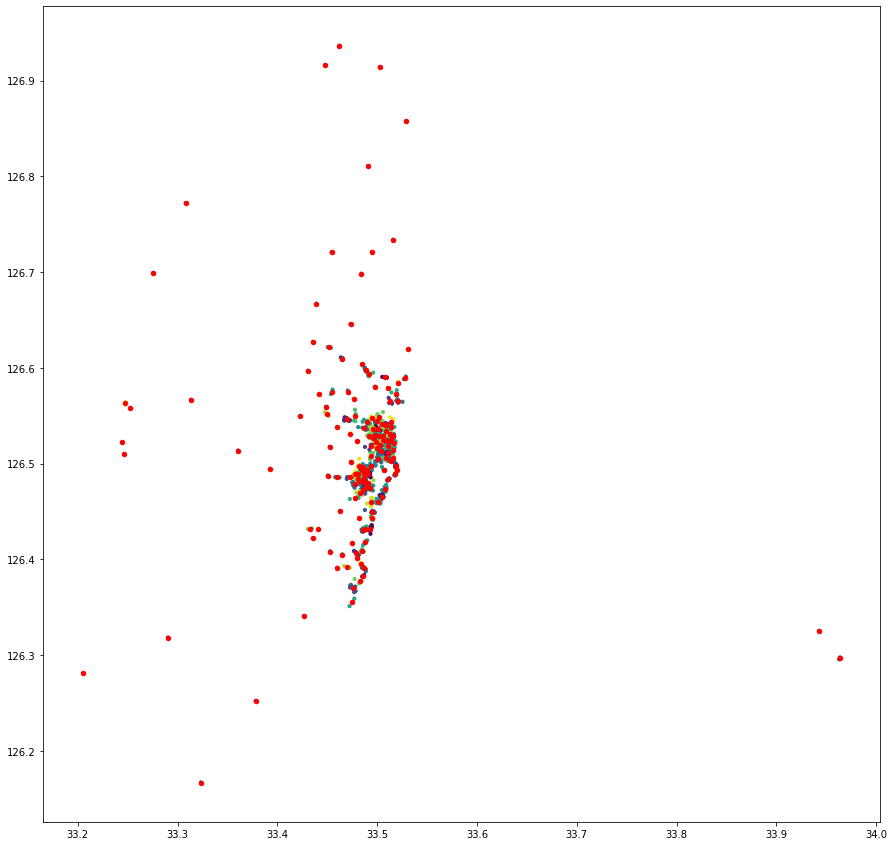

In [0]:
df = DataFrame(jeju_tour,columns=['위도','경도'])
plt.figure(figsize=(15,15))

kmeans = KMeans(n_clusters=150).fit(df)
centroids = kmeans.cluster_centers_
#print(centroids)

plt.scatter(jeju_tour['위도'], jeju_tour['경도'], c= kmeans.labels_.astype(float), s=10, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=20)

In [0]:
for i in range(len(jeju_tour)):
    if jeju_tour['위도'][i]>33.9 :
        print(i)
print(i)

12
13
14
1216


In [0]:
jeju_tour['위도'][12],jeju_tour['위도'][13]

(33.963828, 33.963086)

In [0]:
jeju_tour.drop(12,0, inplace=True)
jeju_tour.drop(13,0, inplace=True)
jeju_tour.drop(14,0, inplace=True)
jeju_tour.drop(637,0, inplace=True)

In [0]:
jeju_tour.iloc[12,]

위도     33.515856
경도    126.501965
Name: 15, dtype: float64

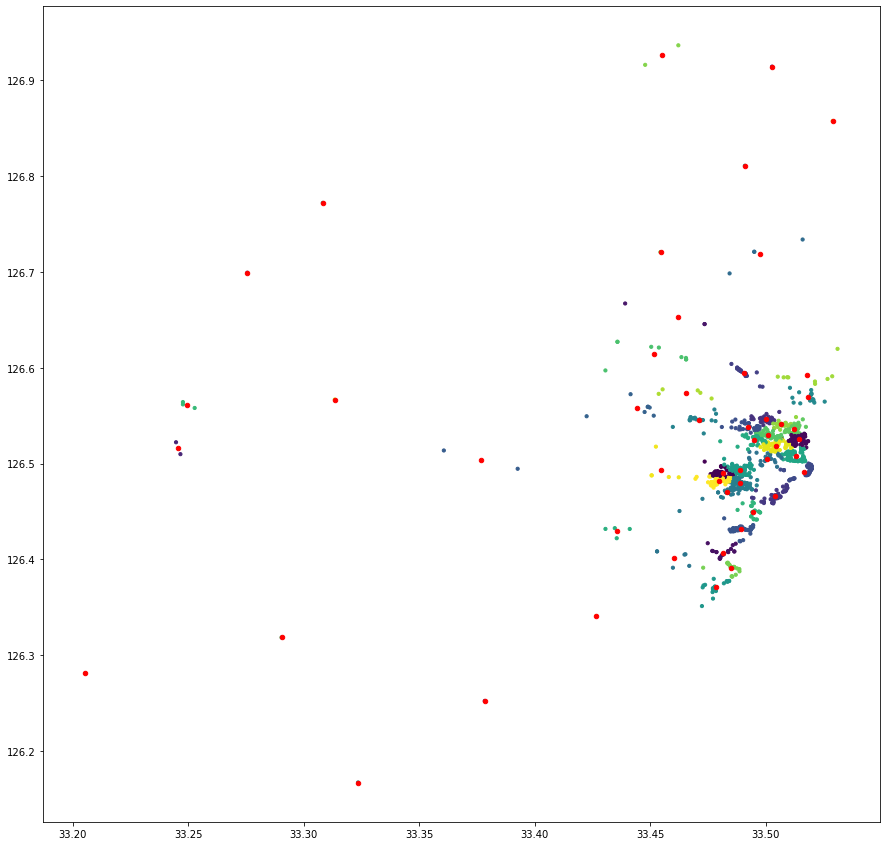

In [0]:
df = DataFrame(jeju_tour,columns=['위도','경도'])
plt.figure(figsize=(15,15))

kmeans = KMeans(n_clusters=50).fit(df)
centroids = kmeans.cluster_centers_
#print(centroids)

plt.scatter(jeju_tour['위도'], jeju_tour['경도'], c= kmeans.labels_.astype(float), s=10, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=20)

In [0]:
#제주도 제주시 전기 충전소 최적화 위치 (2015년 기준)
b = folium.Map(location=[33.49102, 126.53], zoom_start=12.5)
for i in range(len(centroids)):
    folium.Marker([centroids[i,0], centroids[i,1]]).add_to(b)
b

In [0]:
#제주도 관광지,쇼핑몰, 음식점 위치 + 전기 충전소 최적화 위치 (2015년 기준)
c = folium.Map(location=[33.49102, 126.53],tiles='Stamen Terrain', zoom_start=12.5)

for i in range(1000):
    if infra['구분'][i]in pocket:
        folium.Marker([infra['위치좌표 Y축값 '][i], infra['위치좌표 X축값 '][i]], popup=infra['장소명'][i],
                      icon=folium.Icon(color='orange', icon='cloud')).add_to(c)

for i in range(len(centroids)):
    folium.Marker([centroids[i,0], centroids[i,1]]).add_to(c)

c

### 실제 전기 충전소 위치

In [0]:
elec_station=pd.read_csv("C:/Users/LG/Desktop/프로젝트_EV짜요/제주특별자치도_전기차충전소_20180703.csv", encoding="euc-kr")
elec_station

충전소명            충전소위치상세    설치시도명   휴점일 이용가능시작시각  \
0                 제주도청 1청사              본관주차장  제주특별자치도  연중무휴    00:00   
1                     제주시청          입구 좌측 주차장  제주특별자치도  연중무휴    00:00   
2                제주도청 제2청사  제2청사 입구 좌측 본관 주차장  제주특별자치도  연중무휴    00:00   
3                 제주애월읍사무소              본관주차장  제주특별자치도  연중무휴    00:00   
4                   구좌읍사무소                주차장  제주특별자치도  연중무휴    00:00   
5                     산굼부리              본관주차장  제주특별자치도  연중무휴    00:00   
6                   한경면체육관              본관주차장  제주특별자치도  연중무휴    00:00   
7                    한라도서관              본관주차장  제주특별자치도  연중무휴    00:00   
8                     거문오름              소형주차장  제주특별자치도  연중무휴    00:00   
9                 동백동산습지센터                주차장  제주특별자치도  연중무휴    00:00   
10                  어리목휴게소          오른쪽 화장실 앞  제주특별자치도  연중무휴    00:00   
11                 제주현대미술관         입구 주차장 D구역  제주특별자치도  연중무휴    00:00   
12                관음사지구안내소           좌측 잔디주차장  제주특별자치도  연중무휴    00:00   
13                     비자림       주차장 좌측 화장실 앞  제주특별자치도  연중무휴    00:00   
14           제주소방서 항만119센터                주차장  제주특별자치도  연중무휴    00:00   
15                 노형동주민센터                주차장  제주특별자치도  연중무휴    00:00   
16                방송통신융합센터                주차장  제주특별자치도  연중무휴    00:00   
17                 삼양동주민센터                주차장  제주특별자치도  연중무휴    00:00   
18              녹고뫼안트레안내센터            도로쪽 주차장  제주특별자치도  연중무휴    00:00   
19                   돌문화공원          장애인주차장 2번  제주특별자치도  연중무휴    00:00   
20               봉성리종합복지회관                주차장  제주특별자치도  연중무휴    00:00   
21                제주종합경기장1        실내수영장 앞 주차장  제주특별자치도  연중무휴    00:00   
22               쇠소깍 공영주차장          쇠소깍 끝 주차장  제주특별자치도  연중무휴    00:00   
23               생물종다양성연구소              입구 왼쪽  제주특별자치도  연중무휴    00:00   
24                제주종합경기장2        애향운동장 앞 주차장  제주특별자치도  연중무휴    00:00   
25                외도동 주민센터                주차장  제주특별자치도  연중무휴    00:00   
26                건입동 주민센터                주차장  제주특별자치도  연중무휴    00:00   
27                    해군호텔                주차장  제주특별자치도  연중무휴    00:00   
28                제주농업기술센터                주차장  제주특별자치도  연중무휴    00:00   
29                     만장굴                주차장  제주특별자치도  연중무휴    00:00   
..                     ...                ...      ...   ...      ...   
400                  한경도서관              입구 우측  제주특별자치도  연중무휴    00:00   
401          한림공원 인근 공영주차장      재릉종합관광안내센터 우측  제주특별자치도  연중무휴    00:00   
402                 한림읍체육관                주차장  제주특별자치도  연중무휴    00:00   
403                화북동주민센터                주차장  제주특별자치도  연중무휴    00:00   
404                한반도제주호텔                주차장  제주특별자치도  연중무휴    00:00   
405                  ㈜행운식품                주차장  제주특별자치도  연중무휴    00:00   
406              봄그리고가을리조트                주차장  제주특별자치도  연중무휴    00:00   
407                클럽다인리조트                주차장  제주특별자치도  연중무휴    00:00   
408               롯데마트 제주점                주차장  제주특별자치도  연중무휴    00:00   
409                   제주공항                주차장  제주특별자치도  연중무휴    00:00   
410               남원읍동부보건소              본관주차장  제주특별자치도  연중무휴    00:00   
411                서귀포시민회관              본관주차장  제주특별자치도  연중무휴    00:00   
412                 돈내코야영장              본관주차장  제주특별자치도  연중무휴    00:00   
413             제주국제컨벤션센터2        면세점 앞 대형주차장  제주특별자치도  연중무휴    00:00   
414                  구좌체육관              본관주차장  제주특별자치도  연중무휴    00:00   
415                제주해녀박물관              본관주차장  제주특별자치도  연중무휴    00:00   
416               제주노루생태공원              본관주차장  제주특별자치도  연중무휴    00:00   
417                 별빛누리공원              본관주차장  제주특별자치도  연중무휴    00:00   
418                  조천체육관              본관주차장  제주특별자치도  연중무휴    00:00   
419                 한림읍사무소              본관주차장  제주특별자치도  연중무휴    00:00   
420  제주시 LGBESTSHOP(제주삼도점)                주차장  제주특별자치도  연중무휴    00:00   
421         서귀포시 이마트(서귀포점)               본관2층  제주특별자치도  연중무휴    00:00   
422          제주시 이마트(신제주점)           직원주차장 1층  제주특별자치도  연중무휴    00:00   
423    

In [0]:
jeju = pd.DataFrame({'위도':elec_station['위도'], '경도':elec_station['경도'],'충전소명':elec_station['충전소명']})
jeju.head()

위도          경도       충전소명
0  33.488834  126.498080   제주도청 1청사
1  33.499997  126.531944       제주시청
2  33.489007  126.500682  제주도청 제2청사
3  33.466277  126.351111   제주애월읍사무소
4  33.522544  126.852085     구좌읍사무소

In [0]:
d = folium.Map(location=[33.49102, 126.53],tiles='Stamen Terrain', zoom_start=12.5)
for i in range(len(jeju)):
    folium.Marker([jeju['위도'][i], jeju['경도'][i]], popup=jeju['충전소명'][i]).add_to(d)
d

### 제주도 모든 인프라 고려 후 전기 충전소 위치 설정

In [0]:
jeju_infra=pd.DataFrame({'위도':infra['위치좌표 Y축값 '],'경도':infra['위치좌표 X축값 ']})
jeju_infra.head()

위도          경도
0  33.490775  126.490466
1  33.495028  126.720984
2  33.495028  126.720984
3  33.524176  126.780391
4  33.247745  126.561716

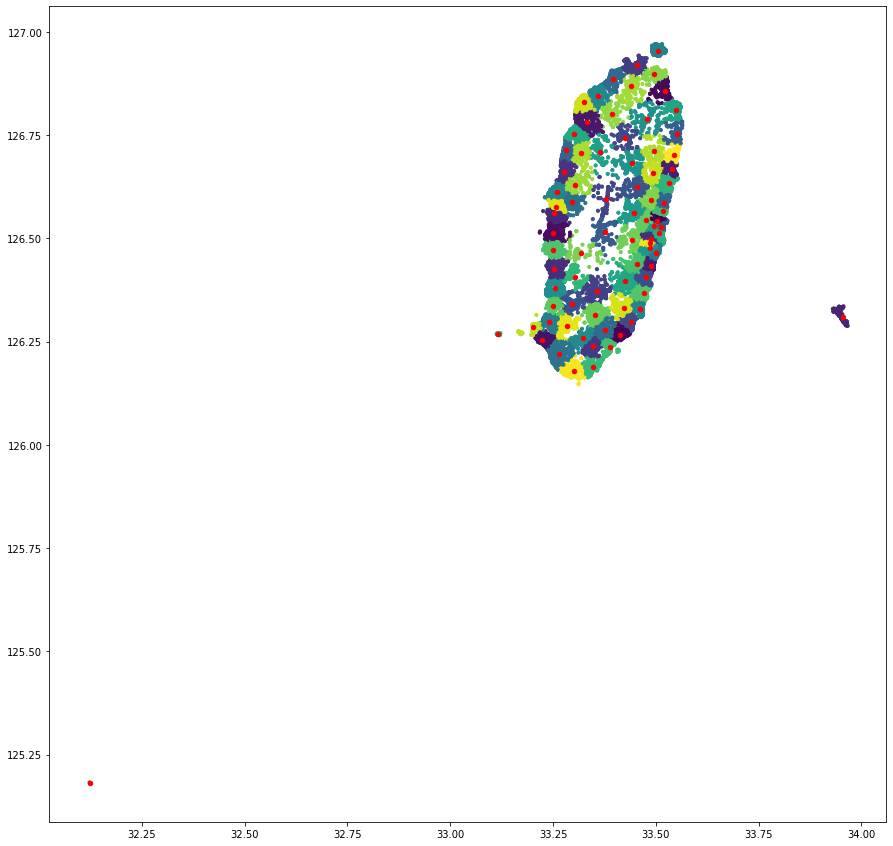

In [0]:
df = DataFrame(jeju_infra,columns=['위도','경도'])
plt.figure(figsize=(15,15))

kmeans = KMeans(n_clusters=80).fit(df)
centroids = kmeans.cluster_centers_
#print(centroids)

plt.scatter(jeju_infra['위도'], jeju_infra['경도'], c= kmeans.labels_.astype(float), s=10, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=20)

In [0]:
jeju_infra.head()

위도          경도
0  33.490775  126.490466
1  33.495028  126.720984
2  33.495028  126.720984
3  33.524176  126.780391
4  33.247745  126.561716

In [0]:
#제주도 제주시 전기 충전소 위치 (2018년 7월 기준)
e= folium.Map(location=[33.49102, 126.53], zoom_start=12.5)
for i in range(len(centroids)):
    folium.Marker([centroids[i,0], centroids[i,1]]).add_to(e)
e

In [0]:
#제주도 관광지,전기 충전소 위치 최적화 (2018년 7월 기준)
f = folium.Map(location=[33.49102, 126.53], zoom_start=12.5)
for i in range(len(centroids)):
    folium.Marker([centroids[i,0], centroids[i,1]]).add_to(f)

for i in range(10000):
    if infra['구분'][i]=="관광/숙박":
        folium.Marker([infra['위치좌표 Y축값 '][i], infra['위치좌표 X축값 '][i]], popup=infra['장소명'][i],
                      icon=folium.Icon(color='orange', icon='info-sign')).add_to(f)
f